In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KDTree
from matplotlib.colors import ListedColormap, BoundaryNorm

import joblib, os
import time

from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings



In [59]:
dist_file = 'data/CLUSTER2_TRAIN_min_dist.csv'
dist_df = pd.read_csv(dist_file)

FileNotFoundError: [Errno 2] No such file or directory: 'data/CLUSTER2_TRAIN_min_dist.csv'

In [ ]:
train_file = 'data/CLUSTER2_TRAIN_cleaned_cities.csv'
train_df = pd.read_csv(train_file, usecols = ['LC_CORINE'])

In [60]:
dist_scaled_df = dist_df/0.668705723715955

NameError: name 'dist_df' is not defined

In [6]:
dist_scaled_df['LC_CORINE'] = train_df['LC_CORINE']

In [7]:
dist_scaled_df['LC_CORINE'] = pd.to_numeric(dist_scaled_df['LC_CORINE'], downcast = 'integer')

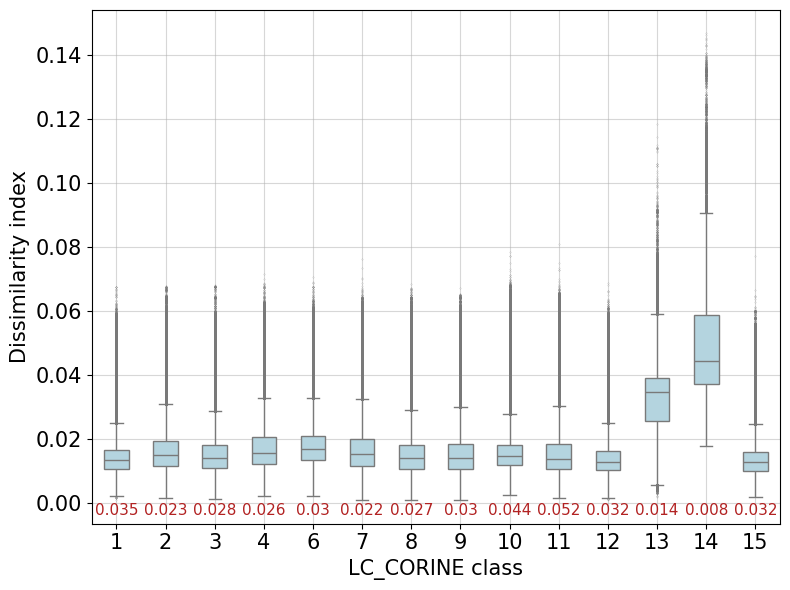

In [8]:
# Assuming dist_scaled_df is already defined and has one column 'dist'
# Add a column to indicate the label for plotting
#dist_scaled_df['label'] = 'Cluster 2'

plt.figure(figsize=(8, 6))

# Custom color palettes
#box_palette = {'Cluster 2': 'skyblue'}
#strip_palette = {'Cluster 2': 'steelblue'}

# Plot boxplot
ax = sns.boxplot(x='LC_CORINE', y='dist', data=dist_scaled_df, width=0.5, showfliers=True, fliersize = 0.1, color= "#add8e6")

# Plot stripplot
#sns.stripplot(x='label', y='dist', data=dist_scaled_df, jitter=True, alpha=0.7, edgecolor='black', palette=strip_palette)
# Compute upper whiskers and collect them
upper_whisker_data = []

grouped = dist_scaled_df.groupby('LC_CORINE')
for i, (label, group) in enumerate(grouped):
    q1 = group['dist'].quantile(0.25)
    q3 = group['dist'].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr
    outlier_count = np.round((group['dist'] > upper_whisker).sum()/len(group['dist']), decimals = 3)

    # Save to list for CSV
    upper_whisker_data.append({'LC_CORINE': label, 'Threshold': upper_whisker})

    # Position of annotation (slightly above the upper whisker)
    y_pos = -0.0045
    ax.text(i, y_pos, f'{outlier_count}', ha='center', va='bottom', fontsize=11, color='firebrick')
del grouped

# Save to CSV
thresholds_df = pd.DataFrame(upper_whisker_data)
thresholds_df.to_csv('results/Thresholds_AOA_CL2.csv', index=False)

# Labels and layout
plt.xlabel('LC_CORINE class', fontsize=15)
plt.ylabel('Dissimilarity index', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\kwint\AppData\Local\Temp\ipykernel_69548\3904622510.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dist_scaled_df.groupby(['LC_CORINE', 'LC_CORINE_LABEL'])


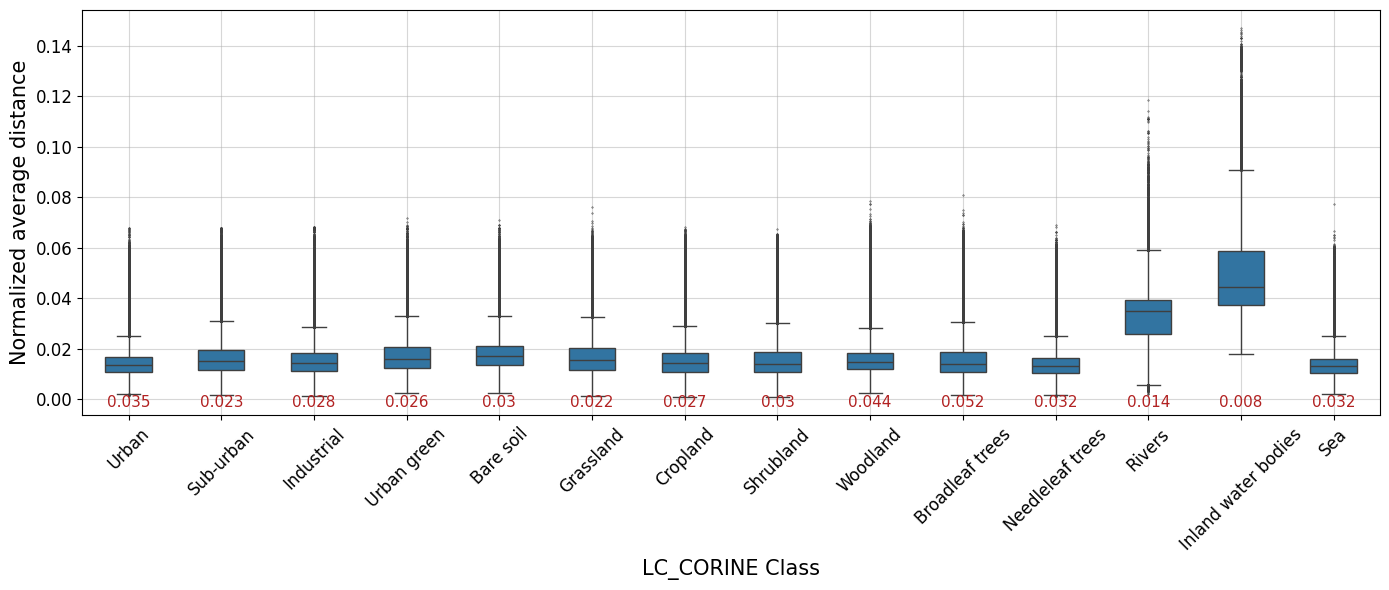

In [ ]:
# Assuming dist_scaled_df exists with 'dist' and 'LC_CORINE' columns

# Define labels and mapping (excluding class 5.0)
lc_labels = [
    "Urban", "Sub-urban", "Industrial", "Urban green",     # 1.0–4.0
    "Bare soil", "Grassland", "Cropland", "Shrubland",      # 6.0–9.0
    "Woodland", "Broadleaf trees", "Needleleaf trees",       # 10.0–12.0
    "Rivers", "Inland water bodies", "Sea"                  # 13.0–15.0
]
lc_class_numbers = [1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
label_mapping = {k: v for k, v in zip(lc_class_numbers, lc_labels)}

# Map and filter
dist_scaled_df = dist_scaled_df[dist_scaled_df['LC_CORINE'] != 5.0].copy()
dist_scaled_df['LC_CORINE_LABEL'] = dist_scaled_df['LC_CORINE'].map(label_mapping)

# Set category order
dist_scaled_df['LC_CORINE_LABEL'] = pd.Categorical(
    dist_scaled_df['LC_CORINE_LABEL'],
    categories=lc_labels,
    ordered=True
)

plt.figure(figsize=(14, 6))

# Plot boxplot
ax = sns.boxplot(
    x='LC_CORINE_LABEL', 
    y='dist', 
    data=dist_scaled_df, 
    width=0.5, 
    showfliers=True, 
    fliersize=0.4
)

# Compute and annotate upper whiskers, collect thresholds
upper_whisker_data = []

grouped = dist_scaled_df.groupby(['LC_CORINE', 'LC_CORINE_LABEL'])
for i, ((code, label), group) in enumerate(grouped):
    q1 = group['dist'].quantile(0.25)
    q3 = group['dist'].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    outlier_count = np.round((group['dist'] > upper_whisker).sum() / len(group['dist']), 3)

    # Save threshold
    upper_whisker_data.append({'LC_CORINE': code, 'Threshold': upper_whisker})

    # Annotate on plot
    y_pos = -0.0045
    ax.text(i, y_pos, f'{outlier_count}', ha='center', va='bottom', fontsize=11, color='firebrick')

# Ensure output directory exists
os.makedirs('results', exist_ok=True)

# Write thresholds to CSV
thresholds_df = pd.DataFrame(upper_whisker_data)
thresholds_df.to_csv('results/Thresholds_AOA_CL2.csv', index=False)

# Finalize plot
plt.xlabel('LC_CORINE Class', fontsize=15)
plt.ylabel('Dissimilarity index', fontsize=15)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


In [2]:

# Columns to use
columns_order = [
    'IMPERV', 'HEIGHT', 'COAST', 'ELEV', 'POP',  
    'RH', 'SP', 'PRECIP', 'T_2M_COR', 'WS', 'TCC',  
    'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL'
]

# Load min-max scaling info and ensure correct matching
min_max_df = pd.read_csv("data/CLUSTER2_min_max.csv", sep=';')
min_max_df.set_index(min_max_df.columns[0], inplace=True)

# Ensure all required columns exist in the min-max file
missing_cols = [col for col in columns_order if col not in min_max_df.index]
if missing_cols:
    raise ValueError(f"The following required columns are missing in CLUSTER2_min_max.csv: {missing_cols}")

# Get min/max values in the same order as columns_order
min_vals = min_max_df.loc[columns_order, 'min'].astype(float).to_numpy()
max_vals = min_max_df.loc[columns_order, 'Max'].astype(float).to_numpy()

# Avoid division by zero
scale = max_vals - min_vals
scale[scale == 0] = 1.0

def min_max_scale(data, min_vals, scale):
    return (data - min_vals) / scale

In [3]:
# Load importances
importances_df = pd.read_csv('AOA_data/importances_CL2.csv')
importances_df.set_index('Feature', inplace=True)

# Map feature names to column names in test_scaled
importance_to_column_map = {
    'IMPERV': 'IMPERV',
    'HEIGHT': 'HEIGHT',
    'COAST': 'COAST',
    'ELEV': 'ELEV',
    'POP': 'POP',
    'RH': 'RH',
    'SP': 'SP',
    'PRECIP': 'PRECIP',
    'T_2M': 'T_2M_COR',  # Important mapping
    'wind_speed': 'WS',
    'TCC': 'TCC',
    'CAPE': 'CAPE',
    'BLH': 'BLH',
    'SSR': 'SSR',
    'SOLAR_ELEV': 'SOLAR_ELEV',
    'DECL': 'DECL'
}

# Build weights array in the same order as test_scaled columns
weights = np.array([
    importances_df.loc[feature, 'Importance'] 
    for feature in importance_to_column_map 
    if importance_to_column_map[feature] in columns_order
])


In [ ]:
# Assume these are already defined
# from your_scaling_module import min_max_scale, min_vals, scale

columns_order = [
    'IMPERV', 'HEIGHT', 'COAST', 'ELEV', 'POP',  
    'RH', 'SP', 'PRECIP', 'T_2M_COR', 'WS', 'TCC',  
    'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL'
]
category_column = 'LC_CORINE'
for i in np.arange(1,16):
    print(f"working on category: {i}")
    target_category_value = i  # Change as needed

    csv_path = 'data/CLUSTER2_TRAIN_cleaned_cities.csv'
    chunksize = 1_000_000

    # Collect filtered data
    filtered_data = []
    chunk_idx = 0
    chunk_start_time = time.time()
    # Stream through the CSV
    for chunk in pd.read_csv(csv_path, usecols=columns_order + [category_column], chunksize=chunksize):
        chunk_idx += 1
        # Filter rows for the desired category
        matches = chunk[chunk[category_column] == target_category_value]
        
        if not matches.empty:
            scaled = min_max_scale(matches[columns_order].to_numpy(), min_vals, scale) * weights
            filtered_data.append(pd.DataFrame(scaled))
        
        duration = time.time() - chunk_start_time
        print(f"Chunk {chunk_idx} processed in {duration:.2f}s")
        chunk_start_time = time.time()

    # Combine all matching rows into one DataFrame
    if filtered_data:
        combined_df = pd.concat(filtered_data, ignore_index=True)
        #train_scaled = min_max_scale(combined_df.to_numpy(), min_vals, scale)*weights
        tree = KDTree(combined_df, leaf_size=40)

        # Save KDTree to disk
        os.makedirs('trees', exist_ok=True)
        os.makedirs('trees/CL2', exist_ok=True)
        tree_path = f'trees/CL2/CLUSTER2_KDTREE_{target_category_value}.joblib'
        joblib.dump(tree, tree_path)

        print(f"KDTree saved to: {tree_path}")
    else:
        print(f"No data found for LC_CORINE == {target_category_value}")

working on category: 1
Chunk 1 processed in 3.34s
Chunk 2 processed in 3.30s
Chunk 3 processed in 3.23s
Chunk 4 processed in 3.28s
Chunk 5 processed in 3.19s
Chunk 6 processed in 3.34s
Chunk 7 processed in 3.26s
Chunk 8 processed in 3.44s
Chunk 9 processed in 3.66s
Chunk 10 processed in 3.61s
Chunk 11 processed in 3.46s
Chunk 12 processed in 3.63s
Chunk 13 processed in 3.44s
Chunk 14 processed in 3.66s
Chunk 15 processed in 3.48s
Chunk 16 processed in 3.44s
Chunk 17 processed in 3.51s
Chunk 18 processed in 3.31s
Chunk 19 processed in 3.41s
Chunk 20 processed in 3.44s
Chunk 21 processed in 3.56s
Chunk 22 processed in 3.42s
Chunk 23 processed in 3.60s
Chunk 24 processed in 3.40s
Chunk 25 processed in 3.46s
Chunk 26 processed in 3.45s
Chunk 27 processed in 3.56s
Chunk 28 processed in 3.55s
Chunk 29 processed in 3.61s
Chunk 30 processed in 3.48s
Chunk 31 processed in 3.57s
Chunk 32 processed in 3.29s
Chunk 33 processed in 3.53s
Chunk 34 processed in 3.47s
Chunk 35 processed in 3.42s
Chunk 

# Example

In [25]:
file_path = r"data/raster_total/total_Naples.csv"
data = pd.read_csv(file_path)

In [26]:
data = data.dropna()
data['SP'] = 102000
data['RH'] = 30
data['PRECIP'] = 0
data['WS'] = 1
data['T_2M_COR'] = 298
data['TCC'] = 0
data['BLH'] = 150
data['SSR'] = 0
data['SOLAR_ELEV'] = -50
data['DECL'] = 20
data['CAPE'] = 500
data['LC_CORINE'] = 7
data = data.reset_index()

In [27]:

# Columns to use
columns_order = [
    'IMPERV', 'HEIGHT', 'COAST', 'ELEV', 'POP',  
    'RH', 'SP', 'PRECIP', 'T_2M_COR', 'WS', 'TCC',  
    'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL'
]

# Load min-max scaling info and ensure correct matching
min_max_df = pd.read_csv("data/CLUSTER2_min_max.csv", sep=';')
min_max_df.set_index(min_max_df.columns[0], inplace=True)

# Ensure all required columns exist in the min-max file
missing_cols = [col for col in columns_order if col not in min_max_df.index]
if missing_cols:
    raise ValueError(f"The following required columns are missing in CLUSTER2_min_max.csv: {missing_cols}")

# Get min/max values in the same order as columns_order
min_vals = min_max_df.loc[columns_order, 'min'].astype(float).to_numpy()
max_vals = min_max_df.loc[columns_order, 'Max'].astype(float).to_numpy()

# Avoid division by zero
scale = max_vals - min_vals
scale[scale == 0] = 1.0

def min_max_scale(data, min_vals, scale):
    return (data - min_vals) / scale

In [28]:
# Load importances
importances_df = pd.read_csv('AOA_data/importances_CL2.csv')
importances_df.set_index('Feature', inplace=True)

# Map feature names to column names in test_scaled
importance_to_column_map = {
    'IMPERV': 'IMPERV',
    'HEIGHT': 'HEIGHT',
    'COAST': 'COAST',
    'ELEV': 'ELEV',
    'POP': 'POP',
    'RH': 'RH',
    'SP': 'SP',
    'PRECIP': 'PRECIP',
    'T_2M': 'T_2M_COR',  # Important mapping
    'wind_speed': 'WS',
    'TCC': 'TCC',
    'CAPE': 'CAPE',
    'BLH': 'BLH',
    'SSR': 'SSR',
    'SOLAR_ELEV': 'SOLAR_ELEV',
    'DECL': 'DECL'
}

# Build weights array in the same order as test_scaled columns
weights = np.array([
    importances_df.loc[feature, 'Importance'] 
    for feature in importance_to_column_map 
    if importance_to_column_map[feature] in columns_order
])
new_data = data


In [29]:

# Scale numerical features
data_scaled = min_max_scale(new_data[columns_order].to_numpy(), min_vals, scale)
weighted_features = data_scaled * weights
lc_values = new_data['LC_CORINE'].values

# Initialize distances for this chunk
data_dists = np.full(len(new_data), np.inf)
distances_list = []

category_start_time = time.time()
# For each class in this new_data, query the corresponding KDTree
for lc_class in np.unique(lc_values):
    print(f'Working on class: {lc_class}')
    tree_path = f'trees/CL2/CLUSTER2_KDTREE_{lc_class}.joblib'
    current_tree = joblib.load(tree_path)

    mask = lc_values == lc_class
    query_points = weighted_features[mask]

    # Query KDTree
    dists, _ = current_tree.query(query_points, k=1)
    data_dists[mask] = dists.flatten()

    duration = time.time() - category_start_time
    print(f"CORINE class {lc_class} processed in {duration:.2f}s")
    category_start_time = time.time()

# Save distances
distances_list.append(pd.DataFrame(data_dists, columns=['dist']))


Working on class: 7
CORINE class 7 processed in 50.79s


In [30]:
distances_list = distances_list[0]/0.668705723715955
new_data['dists'] = distances_list


In [31]:
thresholds_path = 'results/Thresholds_AOA_CL2.csv'
thresholds = pd.read_csv(thresholds_path)

In [32]:
data_AOA = np.full(len(new_data), np.inf)
AOA_list = []
category_start_time = time.time()
for lc_class in np.unique(lc_values):

    mask = lc_values == lc_class
    points = new_data[mask]

    new = points['dists'] <= thresholds.loc[thresholds['LC_CORINE'] == lc_class, 'Threshold'].values[0]

    data_AOA[mask] = new

    duration = time.time() - category_start_time
    print(f"CORINE class {lc_class} processed in {duration:.2f}s")
    category_start_time = time.time()

# Save distances
AOA_list.append(pd.DataFrame(data_AOA, columns=['AOA']))


CORINE class 7 processed in 0.01s


In [33]:
new_data['AOA'] = AOA_list[0]

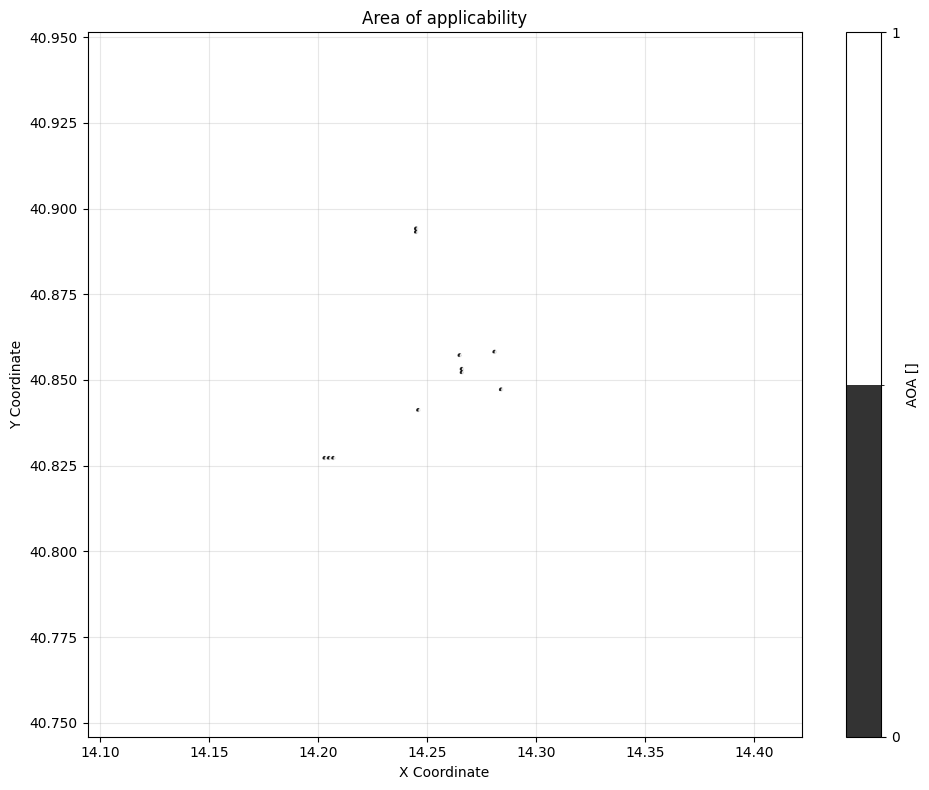

In [34]:
# Define discrete colormap: black for 0, white for 1
cmap = ListedColormap(['black', 'white'])
norm = BoundaryNorm([0, 0.5, 1], ncolors=2)

plt.figure(figsize=(10, 8))
sc = plt.scatter(new_data['x'], new_data['y'], c=new_data['AOA'], cmap=cmap, norm=norm, s=5, alpha=0.8)
cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])
cbar.set_label('AOA []')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Area of applicability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

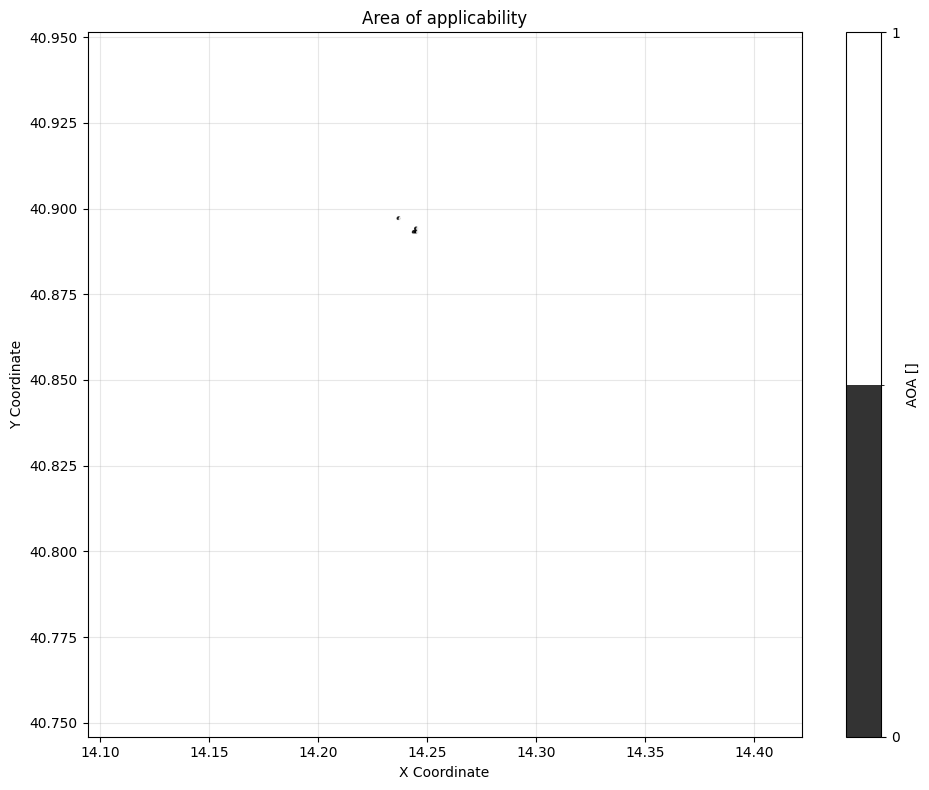

In [12]:
# Define discrete colormap: black for 0, white for 1
cmap = ListedColormap(['black', 'white'])
norm = BoundaryNorm([0, 0.5, 1], ncolors=2)

plt.figure(figsize=(10, 8))
sc = plt.scatter(new_data['x'], new_data['y'], c=new_data['AOA'], cmap=cmap, norm=norm, s=5, alpha=0.8)
cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])
cbar.set_label('AOA []')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Area of applicability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

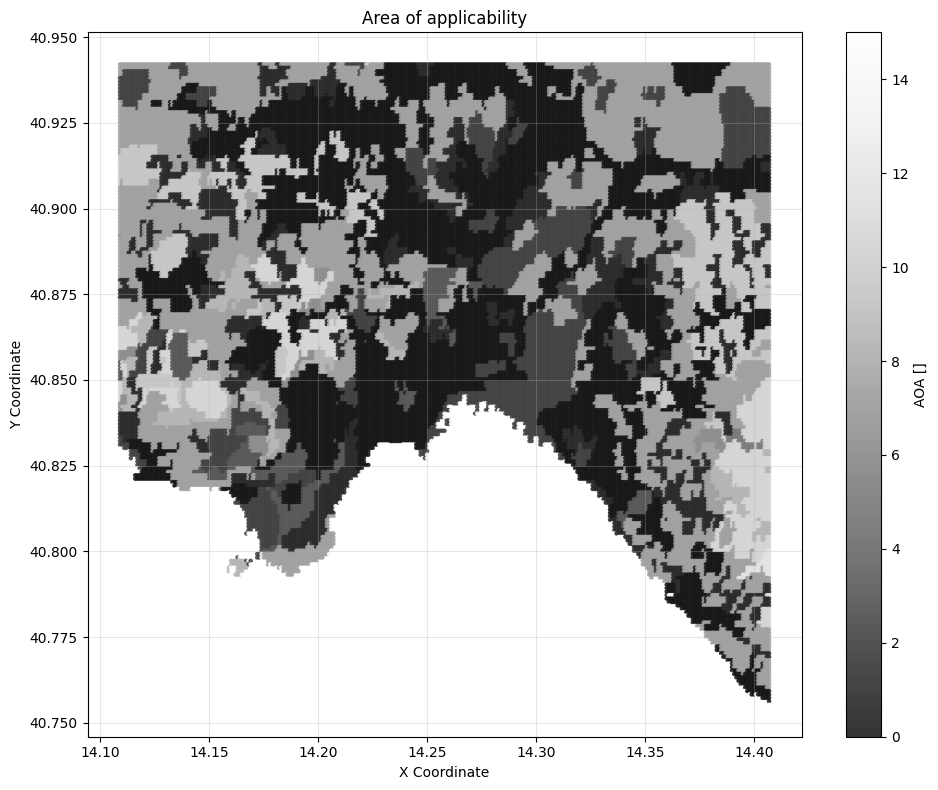

In [134]:

plt.figure(figsize=(10, 8))
sc = plt.scatter(new_data['x'], new_data['y'], c=new_data['LC_CORINE'], cmap = 'Greys_r', s=5, alpha=0.8, vmin = 0, vmax = 15)
plt.colorbar(sc, label='AOA []')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Area of applicability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

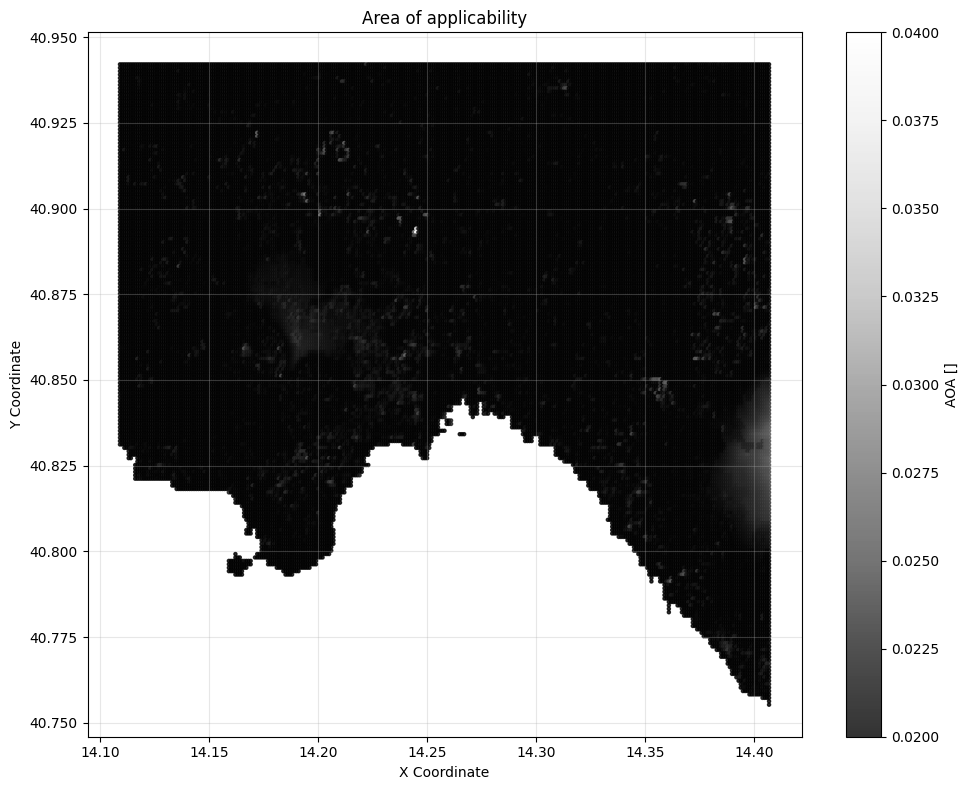

In [56]:

plt.figure(figsize=(10, 8))
sc = plt.scatter(new_data['x'], data['y'], c=data['dists'], cmap = 'Greys_r', s=5, alpha=0.8, vmin = 0.02, vmax = 0.04)
plt.colorbar(sc, label='AOA []')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Area of applicability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Combined for case studies

In [3]:
# run_aoa_and_plot.py


warnings.filterwarnings("ignore")

city_clusters = {
    "CL1": {"Madrid"}#"Belgrado", "Berlin", "Charleroi", "Frankfurt_am_Main", "Ljubljana",
    #        "Lodz", "Lyon", "Madrid", "Sofia", "Szeged", "Vilnius"},
    #"CL2": {"Bari", "Marseille", "Naples", "Palma_de_Mallorca", "Rome", "Sevilla", "Tirana"},
    #"CL3": {"Hamburg", 'Reykjavik'}#"Brussels", "Gdansk", "Hamburg", "Newcastle", "Oslo", "Reykjavik", "Tallinn"}
}

importance_to_column_map = {
    'IMPERV': 'IMPERV', 'HEIGHT': 'HEIGHT', 'COAST': 'COAST', 'ELEV': 'ELEV', 'POP': 'POP',
    'RH': 'RH', 'SP': 'SP', 'PRECIP': 'PRECIP', 'T_2M': 'T_2M_COR', 'wind_speed': 'WS',
    'TCC': 'TCC', 'CAPE': 'CAPE', 'BLH': 'BLH', 'SSR': 'SSR', 'SOLAR_ELEV': 'SOLAR_ELEV', 'DECL': 'DECL'
}

scaling_factors = {"CL1": 0.7118433562961, "CL2": 0.668705723715955, "CL3": 0.722033013807132}
allowed_sensitivity_columns = ['HEIGHT', 'POP', 'IMPERV']

def min_max_scale(data, min_vals, scale):
    return (data - min_vals) / scale

for cluster, cities in city_clusters.items():
    columns_order = ['IMPERV', 'HEIGHT', 'COAST', 'ELEV', 'POP', 'RH', 'SP', 'PRECIP', 'T_2M_COR',
                     'WS', 'TCC', 'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL']

    min_max_df_cluster = pd.read_csv(f"data/CLUSTER{cluster[-1]}_min_max.csv", sep=';')
    min_max_df_cluster.set_index(min_max_df_cluster.columns[0], inplace=True)
    min_vals = min_max_df_cluster.loc[columns_order, 'min'].astype(float).to_numpy()
    max_vals = min_max_df_cluster.loc[columns_order, 'Max'].astype(float).to_numpy()
    scale = max_vals - min_vals
    scale[scale == 0] = 1.0

    importances_df = pd.read_csv(f'AOA_data/importances_{cluster}.csv')
    importances_df.set_index('Feature', inplace=True)
    weights = np.array([importances_df.loc[feature, 'Importance'] for feature in importance_to_column_map if importance_to_column_map[feature] in columns_order])
    thresholds = pd.read_csv(f'results/Thresholds_AOA_{cluster}.csv')
    scaling_factor = scaling_factors[cluster]
    start_time = time.time()
    for city in cities:
    
        print(f"Processing AOA and plotting for {city}...")
        try:
            data = pd.read_csv(f"results/{cluster}/{city}_pred.csv")
        except FileNotFoundError:
            print(f"No prediction data found for {city}, skipping.")
            continue

        lc_values = data['LC_CORINE'].values
        data_scaled = min_max_scale(data[columns_order].to_numpy(), min_vals, scale)
        weighted_features = data_scaled * weights

        data_dists = np.full(len(data), np.inf)
        for lc_class in np.unique(lc_values):
            tree_path = f'trees/{cluster}/CLUSTER{cluster[-1]}_KDTREE_{lc_class}.joblib'
            current_tree = joblib.load(tree_path)
            mask = lc_values == lc_class
            dists, _ = current_tree.query(weighted_features[mask], k=1)
            data_dists[mask] = dists.flatten()

        distances_list = data_dists / scaling_factor
        data['dists'] = distances_list

        AOA_array = np.full(len(data), np.inf)
        for lc_class in np.unique(lc_values):
            mask = lc_values == lc_class
            threshold = thresholds.loc[thresholds['LC_CORINE'] == lc_class, 'Threshold'].values[0]
            AOA_array[mask] = distances_list[mask] <= threshold
        data['AOA'] = AOA_array.astype(int)

        duration = time.time() - start_time
        print(f"{city} processed in {duration:.2f}s")
        time_start = time.time()

        x_unique = np.sort(data['x'].unique())
        y_unique = np.sort(data['y'].unique())[::-1]
        x_dim, y_dim = len(x_unique), len(y_unique)

        for feature in allowed_sensitivity_columns:
            vmin = -0.5

            # AOA original
            aoa_original = data['AOA'].values.astype(bool)

            # Perturbed data
            perturbed_data = data[columns_order].copy().to_numpy()
            feature_idx = columns_order.index(feature)
            perturbed_data[:, feature_idx] *= 0.5
            perturbed_scaled = min_max_scale(perturbed_data, min_vals, scale)
            perturbed_weighted = perturbed_scaled * weights

            dists_perturbed = np.full(len(data), np.inf)
            for lc_class in np.unique(lc_values):
                mask = lc_values == lc_class
                kd_path = f'trees/{cluster}/CLUSTER{cluster[-1]}_KDTREE_{lc_class}.joblib'
                tree = joblib.load(kd_path)
                d_class, _ = tree.query(perturbed_weighted[mask], k=1)
                dists_perturbed[mask] = d_class.flatten()

            threshold_map = thresholds.set_index('LC_CORINE')['Threshold'].to_dict()
            aoa_perturbed = np.array([dists_perturbed[j] <= threshold_map[lc] for j, lc in enumerate(lc_values)])

            # Valid: both original and perturbed inside AOA
            valid_mask = aoa_original & aoa_perturbed

            z = np.full((y_dim, x_dim), np.nan)
            valid_pixel_mask = np.full((y_dim, x_dim), False)
            aoa_fail_mask = np.full((y_dim, x_dim), False)

            for idx, row in data.iterrows():
                xi = np.where(x_unique == row['x'])[0][0]
                yi = np.where(y_unique == row['y'])[0][0]
                valid_pixel_mask[yi, xi] = True

                if valid_mask[idx]:
                    z[yi, xi] = row[f"SI_{feature}"]
                else:
                    aoa_fail_mask[yi, xi] = True

            final_mask = aoa_fail_mask & valid_pixel_mask
            z_masked = np.ma.array(z, mask=final_mask)

            cmap = plt.get_cmap('RdYlGn_r').copy()
            cmap.set_bad(color='black')

            aspect_ratio = x_dim / y_dim
            fig, ax = plt.subplots(figsize=(6 * aspect_ratio, 6))
            im = ax.imshow(z_masked, cmap=cmap, vmin=vmin, vmax=0,
                           extent=(x_unique[0], x_unique[-1], y_unique[-1], y_unique[0]))

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="3%", pad=0.1)
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label('Reduced temperature [K]')
            pos = cax.get_position()
            cax.set_position([pos.x0, pos.y0 + pos.height * 0.2, pos.width, pos.height * 0.6])

            ax.set_xlabel('Longitude [°E]')
            ax.set_ylabel('Latitude [°N]')
            ax.grid(False)
            plt.tight_layout()

            save_path = os.path.join("Figures", cluster, "case_studies_new", f"{city}_{feature}.png")
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(save_path, dpi=300)
            plt.close()


Processing AOA and plotting for Madrid...
Madrid processed in 785.90s


KeyboardInterrupt: 